In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_rows",None)

In [3]:
train_data_path = r"C:\Users\MyPc\Documents\house_price_prediction\data\train.csv"
test_data_path = r"C:\Users\MyPc\Documents\house_price_prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("shape of df_train: ",df_train.shape)
print("shape of df_test: ",df_test.shape)

shape of df_train:  (1460, 81)
shape of df_test:  (1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df = pd.concat([df_train,df_test])

print("Shape of integrated data/ df: ",df.shape)

Shape of integrated data/ df:  (2919, 81)


In [7]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total no.  of integer features: ",int_features.shape[0])
print("integer features names: ",int_features.tolist())

Total no.  of integer features:  26
integer features names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [8]:
float_features = int_features = df.select_dtypes(include=["float64"]).columns
print("Total no.  of floating features: ",float_features.shape[0])
print("floating features names: ",float_features.tolist())

Total no.  of floating features:  12
floating features names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [9]:
cat_features = int_features = df.select_dtypes(include=["object"]).columns
print("Total no.  of Categorical features: ",cat_features.shape[0])
print("Categorical  features names: ",cat_features.tolist())

Total no.  of Categorical features:  43
Categorical  features names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


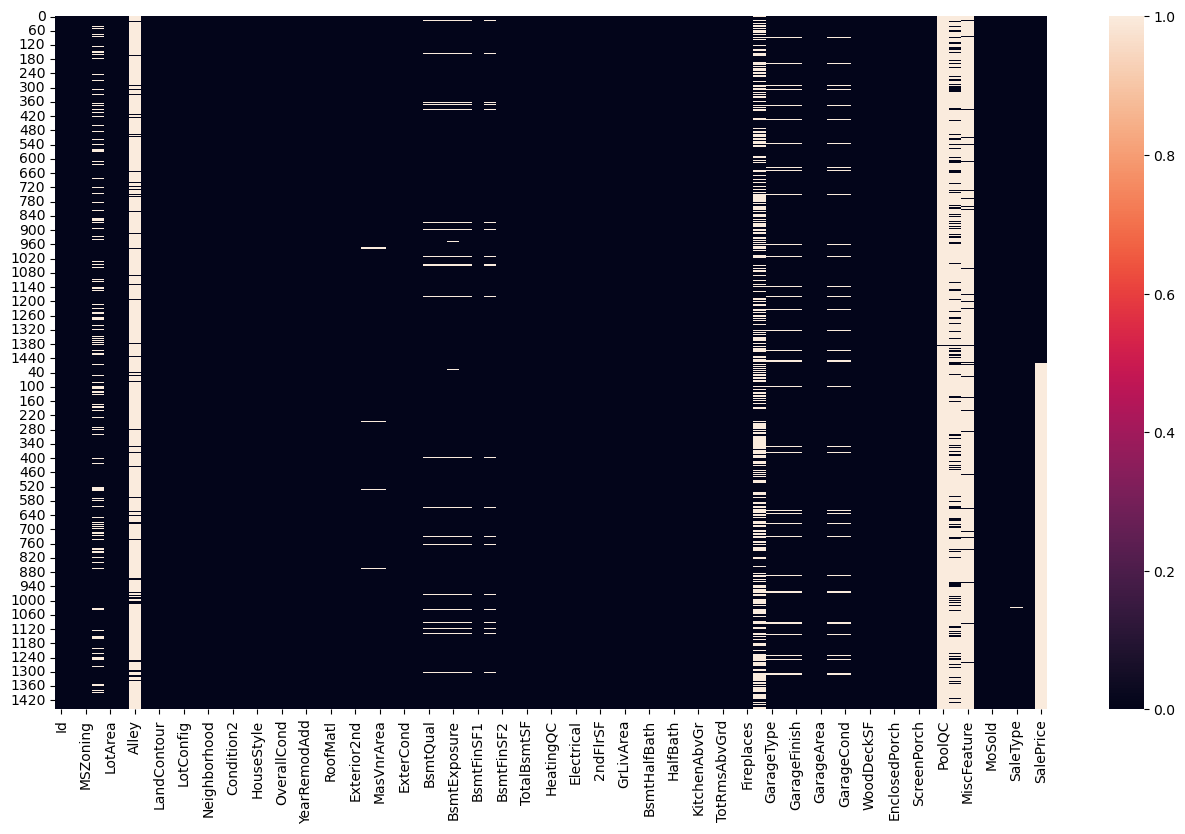

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

In [12]:
df = df.set_index('Id')

In [13]:
null_percent = df.isnull().sum()/df.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [14]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [15]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

In [16]:
missing_Value_feat = null_percent[null_percent > 0]
print("Total missing value features = ", len(missing_Value_feat))

Total missing value features =  35


In [17]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [18]:
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [19]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode,inplace = True)
df_mvi["MSZoning"].isnull().sum()

0

In [20]:
df_mvi["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [21]:
alley_count = "NA"
df_mvi["Alley"].replace(np.nan, alley_count, inplace=True)
df_mvi["Alley"].isnull().sum()

0

In [22]:
def boxHistPlot(df, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.displot(df)
    plt.subplot(122)
    sns.displot(df)
    

C:\Users\MyPc\AppData\Local\Temp\ipykernel_9180\650679912.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


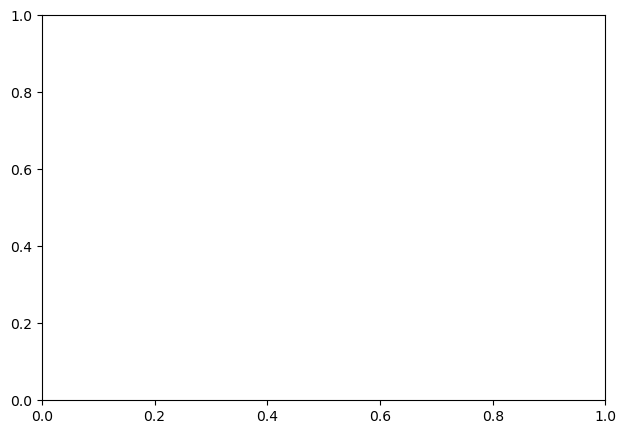

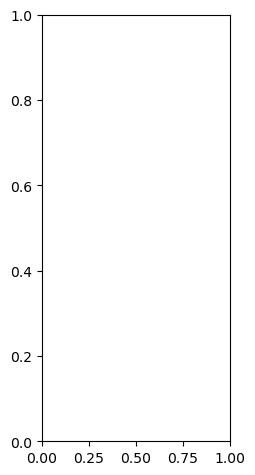

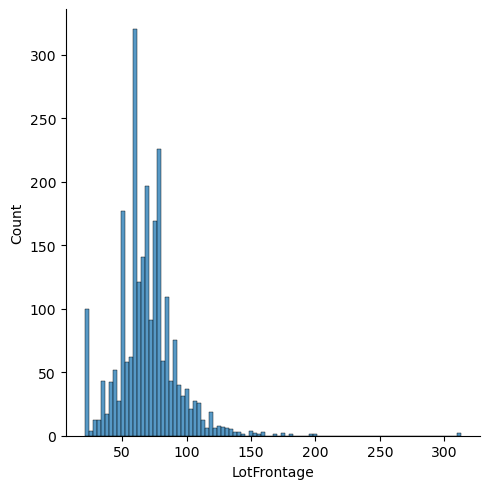

In [23]:
boxHistPlot(df["LotFrontage"])

In [24]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan,lotfrontage_mean,inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [25]:
def oldNewBoxHistPlot(df, df_new,feature, figsize = (16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("Old Data Distribution") 
    plt.figure(figsize=figsize)
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("New Data Distribution")
 

In [26]:
df["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [27]:
Utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,Utilities_mode, inplace= True)
df_mvi["Utilities"].isnull().sum()

0

In [28]:
df["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [29]:
df["Exterior2nd"].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [30]:
Exterior1st_mode = df["Exterior1st"].mode()[0]
Exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,Exterior1st_mode, inplace= True)
df_mvi["Exterior2nd"].replace(np.nan,Exterior2nd_mode, inplace= True)
print("E1st is null: ", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null: ", df_mvi["Exterior2nd"].isnull().sum())

E1st is null:  0
E2nd is null:  0


<Axes: ylabel='Id'>

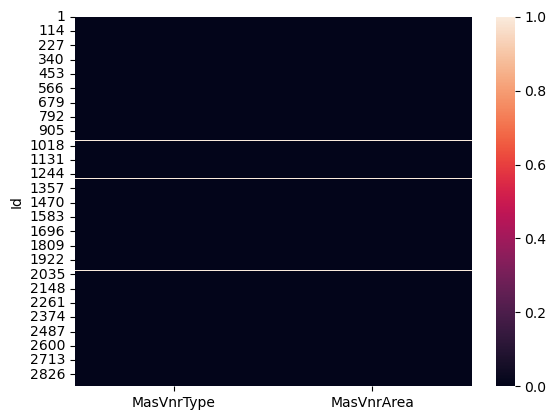

In [31]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [32]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN


In [33]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,masvnrtype_mode, inplace= True)
df_mvi["MasVnrType"].isnull().sum()

0

C:\Users\MyPc\AppData\Local\Temp\ipykernel_9180\650679912.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


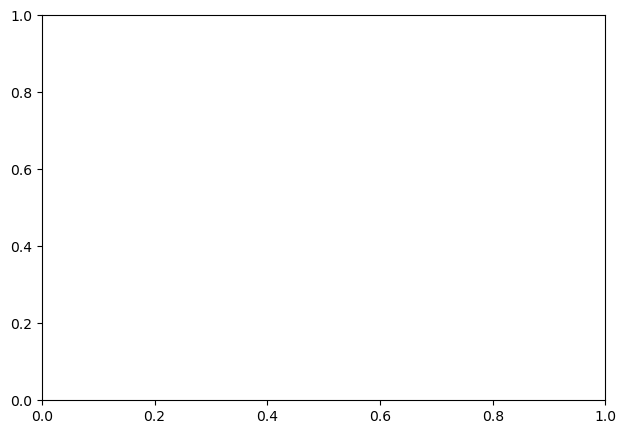

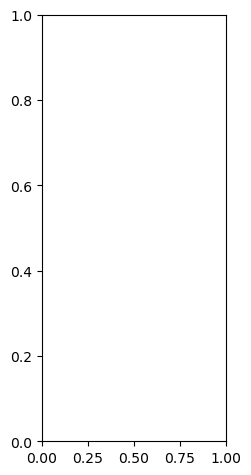

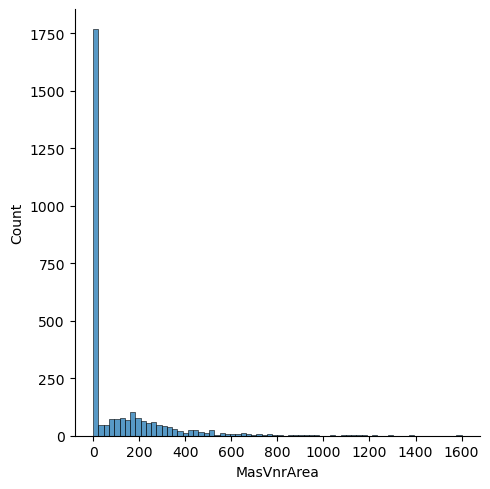

In [34]:
boxHistPlot(df["MasVnrArea"])

In [35]:
masvnrarea_cont = 0
df_mvi["MasVnrArea"].replace(np.nan,masvnrarea_cont, inplace= True)
df_mvi["MasVnrArea"].isnull().sum()

0

In [36]:
cat_bsmt_feat = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
]

num_bsmt_feat = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

<Axes: ylabel='Id'>

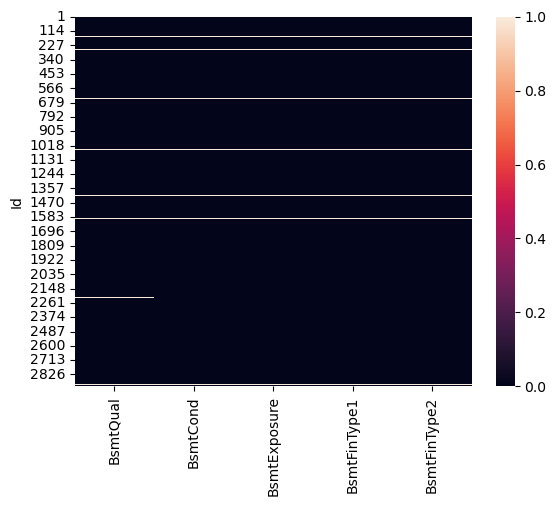

In [37]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [38]:
for feat in cat_bsmt_feat:
     print(f"value count of {feat}: {df[feat].value_counts()}")

value count of BsmtQual: TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
value count of BsmtCond: TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
value count of BsmtExposure: No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
value count of BsmtFinType1: Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
value count of BsmtFinType2: Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [39]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
     df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)

In [40]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

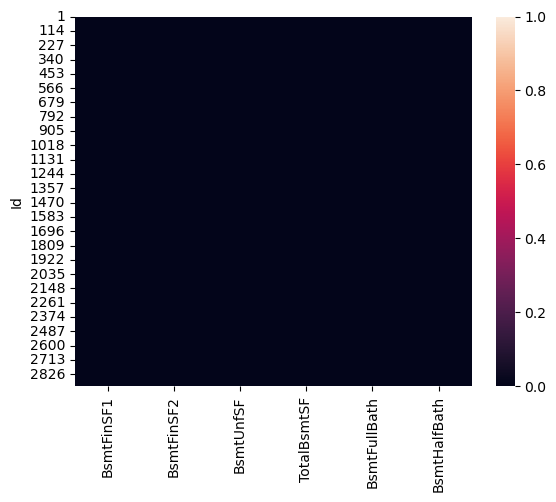

In [41]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [42]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
bsmt_num = 0
for feat in num_bsmt_feat:
     df_mvi[feat].replace(np.nan, bsmt_num, inplace=True) 

In [44]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [45]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [46]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [47]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [48]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,electrical_mode, inplace= True)
df_mvi["Electrical"].isnull().sum()

0

In [49]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,KitchenQual_mode, inplace= True)
df_mvi["KitchenQual"].isnull().sum()

0

In [50]:
df["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [51]:
df["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [52]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,Functional_mode, inplace= True)
df_mvi["Functional"].isnull().sum()

0

In [53]:
SaleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,SaleType_mode, inplace= True)
df_mvi["SaleType"].isnull().sum()

0

In [54]:
other_cat_feat = ["FireplaceQu",'PoolQC', 'Fence', 'MiscFeature']

for feat in other_cat_feat:
     print(f"value count of {feat}: {df[feat].value_counts()}")

value count of FireplaceQu: Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
value count of PoolQC: Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
value count of Fence: MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
value count of MiscFeature: Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [55]:
FireplaceQu_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan,SaleType_mode, inplace= True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [56]:
PoolQC_cont = "NA"
df_mvi["PoolQC"].replace(np.nan,SaleType_mode, inplace= True)
df_mvi["PoolQC"].isnull().sum()

0

In [57]:
Fence_cont = "NA"
df_mvi["Fence"].replace(np.nan,Fence_cont, inplace= True)
df_mvi["Fence"].isnull().sum()

0

In [58]:
MiscFeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan,MiscFeature_cont, inplace= True)
df_mvi["MiscFeature"].isnull().sum()

0

In [59]:
cat_garage_feat = ["GarageArea", "GarageFinish","GarageQual","GarageCond"]
num_garage_feat = ["GarageYrBlt","GarageCars","GarageArea"]

df_garage = df[num_garage_feat+cat_garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageArea,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,0.0,NaN,NaN,NaN
49,NaN,0.0,0.0,0.0,NaN,NaN,NaN
79,NaN,0.0,0.0,0.0,NaN,NaN,NaN
89,NaN,0.0,0.0,0.0,NaN,NaN,NaN
90,NaN,0.0,0.0,0.0,NaN,NaN,NaN
100,NaN,0.0,0.0,0.0,NaN,NaN,NaN
109,NaN,0.0,0.0,0.0,NaN,NaN,NaN
126,NaN,0.0,0.0,0.0,NaN,NaN,NaN
128,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [60]:
garage_cont = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,garage_cont,inplace = True)
    
df_mvi[cat_garage_feat].isnull().sum()

GarageArea      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [61]:
garage_num = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,garage_num,inplace = True)
    
df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [62]:
df_mvi.isnull().any(axis=1).sum()

1540

In [63]:
for_num_conv = ["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [64]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [65]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [66]:
calendar.month_abbr[12]

'Dec'

In [67]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [68]:
for feat in for_num_conv:
    df_mvi[feat].astype(str)

In [69]:
ordinal_end_var = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2',
"HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC","Functional","GarageFinish","PavedDrive","Utilities"]

In [70]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [71]:
 df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes

In [72]:
 df_mvi["BsmtExposure"].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [73]:
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],ordered=True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [74]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [75]:
df_encod = df_mvi.copy()
object_features = df_encod.select_dtypes(include="object").columns.tolist()

In [76]:
df_encod[object_features].head(2)

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Heating,CentralAir,Electrical,GarageType,GarageArea,Fence,MiscFeature,MoSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,GasA,Y,SBrkr,Attchd,548.0,NA,NA,Feb,WD,Normal
2,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,GasA,Y,SBrkr,Attchd,460.0,NA,NA,May,WD,Normal


In [77]:
print("Shape of DF before encoding: ", df_encod.shape)

df_encod = pd.get_dummies(df_encod, columns = object_features, prefix=object_features, drop_first=True)
print("Shape of DF after encoding: ", df_encod.shape)

Shape of DF before encoding:  (2919, 80)
Shape of DF after encoding:  (2919, 820)


In [78]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

In [79]:
df_encod.shape

(2919, 820)

In [80]:
len_train = df_train.shape[0]
len_train

1460

In [81]:
X_train = df_encod[:len_train].drop("SalePrice",axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice",axis=1)

In [82]:
X_test.shape

(1459, 819)

In [83]:
sc = StandardScaler()
sc.fit(X_train)
#formula = z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [84]:
X_train[:3,:]

array([[ 0.07337496, -0.22335706, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.45789401, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496, -0.08710685,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [85]:
pip install --upgrade xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [86]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

from sklearn.isotonic import IsotonicRegression

In [89]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr =  GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr =  RandomForestRegressor()
xgbr = XGBRegressor

mlpr = MLPRegressor()
ir = IsotonicRegression()

In [90]:
models = {"a":["LinearRegression",lr],
          "b":["SVR",svr],
          "c":["SGDRegressor",sgdr],
          "d":["KNeighborsRegressor",knr],
          "e":["GaussianProcessRegressor",gpr],
          "f":["DecisionTreeRegressor",dtr],
          "g":["GradientBoostingRegressor",gbr],
          "h":["RandomForestRegressor",rfr],
          "i":["XGBRegressor",xgbr],
          "j":["MLPRegressor",mlpr],
          "k":["IsotonicRegression",ir]
    }

In [91]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score